In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import spacy


# Load the dataset
df = pd.read_csv('sentiment_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


In [6]:
df.sample(15)

,Unnamed: 0,Comment,Sentiment
125339,126117,modi bharat,1
31337,32114,drinks din w amy lori,1
127568,128346,operation called lasted minutes made nation wo...,1
231949,232727,modi chose varanasi rahul chooses wayanad made...,1
77366,78143,prefer wunderlist since move around tasks app ...,1
186408,187186,modi fans unite take oath see maximum number v...,2
15965,16007,definitely seeing blonsky wong sure next episo...,2
113051,113829,chennai floating friends north west east india...,2
113881,114659,modi dont freebie distribution dig right time ...,2
66847,67624,keep getting pet days heard weekend fab weddin...,2


# 0 for Negative , 1 for Neutral , 2 for Positive

# Cleaning

In [8]:
df.isnull().sum()


Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64

In [ ]:
df.dropna(subset=['Comment'], inplace=True)
df.drop(columns= ['Unnamed: 0'], inplace=True)


In [6]:
nlp = spacy.load("en_core_web_sm")

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', " ", text)     
    text = re.sub(r'@\w+|#\w+', " ", text)          
    text = re.sub(r'\d+', " ", text)               
    text = re.sub(r"[^a-z\s]", " ", text)       
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  

    # tokenization + lemmatization + stopword removal + punct removal
    doc = nlp(text)
    tokens = [          # returnet as a list
        token.lemma_ 
        for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    return tokens

df['tokens'] = df['Comment'].apply(clean_and_tokenize) # apply the function for each row in the comment column

In [7]:
df.sample(20)

,Comment,Sentiment,tokens
21723,soupysoup time today heinz cream chicken mushr...,1,"[soupysoup, time, today, heinz, cream, chicken..."
173746,urmila matondkar shame kashmiri pandits women ...,2,"[urmila, matondkar, shame, kashmiri, pandit, w..."
21006,buy new washer bought dryer dryer labeled elec...,0,"[buy, new, washer, buy, dryer, dryer, label, e..."
226503,journalists asked modi lacs ask rahul,1,"[journalist, ask, modi, lac, ask, rahul]"
72847,katieedwards cant yet back ive run texts ill r...,0,"[katieedward, not, ve, run, text, ill, ring, l..."
115582,possible namami gange project run modi govt,1,"[possible, namami, gange, project, run, modi, ..."
55241,nice application update everyday progress repo...,2,"[nice, application, update, everyday, progress..."
184325,jaishemohammed gives death threat former isro ...,1,"[jaishemohammed, give, death, threat, isro, ch..."
166464,modi biryanidoes shah hint,1,"[modi, biryanidoe, shah, hint]"
224977,simple wants make modi win hook crook destroyi...,2,"[simple, want, modi, win, hook, crook, destroy..."


Text(0.5, 1.0, 'Distribution of Sentiment Classes')

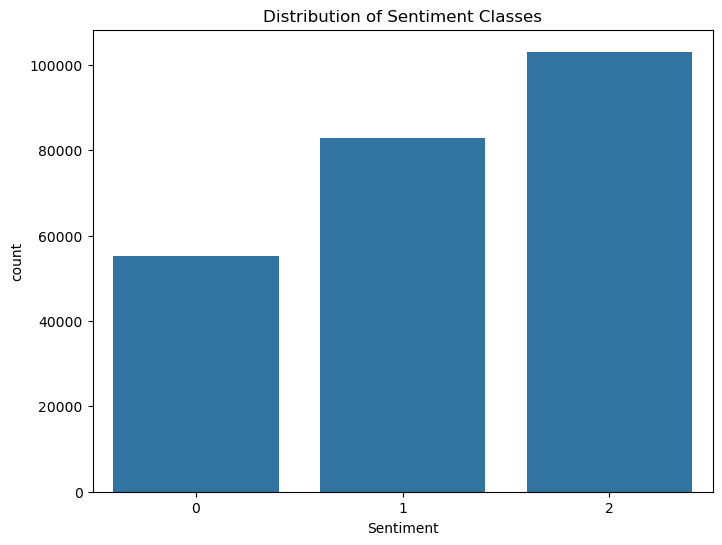

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment Classes')

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

df['tokens_str'] = df['tokens'].apply(lambda x: " ".join(x))  # convert list of tokens back to string
vectorizer = CountVectorizer(max_features=10000) 
X = vectorizer.fit_transform(df['tokens_str'])
y = df['Sentiment'] # 0 for Negative , 1 for Neutral , 2 for Positive
print(X.shape)  

(240928, 10000)


In [10]:
# bulding the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200 , class_weight='balanced' , multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\Mveun\anaconda3\envs\DATA_PROJECT\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Mveun\anaconda3\envs\DATA_PROJECT\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70     11023
           1       0.71      0.80      0.75     16631
           2       0.84      0.74      0.78     20532

    accuracy                           0.75     48186
   macro avg       0.74      0.75      0.74     48186
weighted avg       0.76      0.75      0.75     48186

Accuracy: 0.7512555514049724
[[ 7803  2017  1203]
 [ 1673 13256  1702]
 [ 1915  3476 15141]]


The model's performance is reasonable considering that we used a Bag-of-Words approach. While it captures the general trends in the comments, it does not take into account the context or the sequence of words, which limits the achievable accuracy

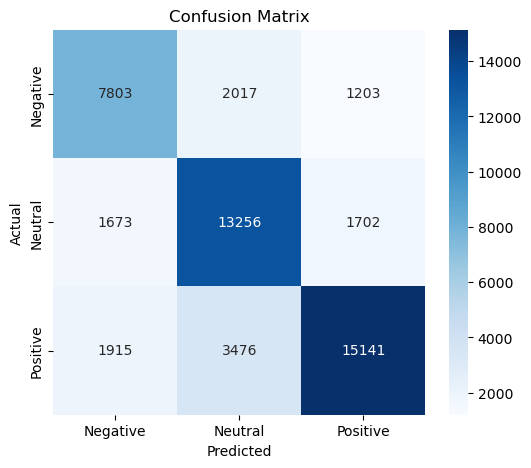

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
feature_names = vectorizer.get_feature_names_out()
for i, class_label in enumerate(model.classes_):
    top_features = np.argsort(model.coef_[i])[-10:]  # أعلى 10 كلمات لكل فئة
    print(f"Top words for class {class_label}:")
    print(", ".join(feature_names[j] for j in top_features))
    print("-"*50)

Top words for class 0:
worst, terrible, devastating, scathing, idiot, cruel, pathetic, disgusting, shocking, moron
--------------------------------------------------
Top words for class 1:
preplanne, anthem, jess, navigate, physicist, availability, starwarsday, tile, investing, hulk
--------------------------------------------------
Top words for class 2:
fascinating, awesome, amazing, brilliant, brave, excellent, wisely, successful, successfully, proud
--------------------------------------------------
